In [1]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('./data/ex6data1.mat')
print(mat.keys())
data = pd.DataFrame(mat['X'], columns = ['X1', 'X2'])
data['y'] = mat['y']
data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


# Visualize Data

Pay attention to the edge case at the left hand side

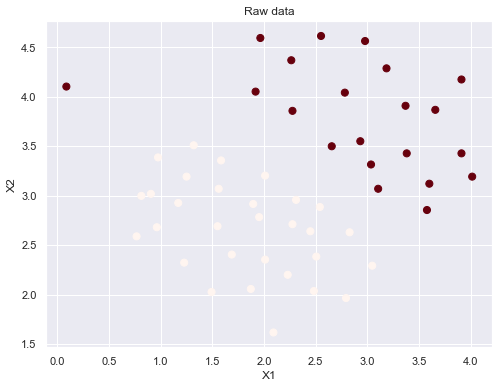

In [11]:
sns.set(style = 'darkgrid', palette = 'Set1')
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(data['X1'], data['X2'], s = 50, c = data['y'], cmap = 'Reds')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

# try $C = 1$

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [15]:
svc1 = sklearn.svm.LinearSVC(C = 1, loss = 'hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

/home/wjk/anaconda3/envs/common/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9803921568627451

In [16]:
data['SVM1_Confidence'] = svc1.decision_function(data[['X1', 'X2']])

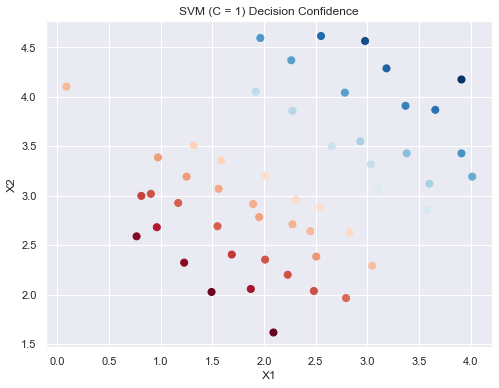

In [19]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(data['X1'], data['X2'], s = 50, c = data['SVM1_Confidence'], cmap = 'RdBu')
ax.set_title('SVM (C = 1) Decision Confidence')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

# try $C = 100$

with large C, you try overfit the data, so the left hand side edge case now is categorized right

In [21]:
svc100 = sklearn.svm.LinearSVC(C = 100, loss = 'hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

/home/wjk/anaconda3/envs/common/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9411764705882353

In [22]:
data['SVM100_Confidence'] = svc100.decision_function(data[['X1', 'X2']])

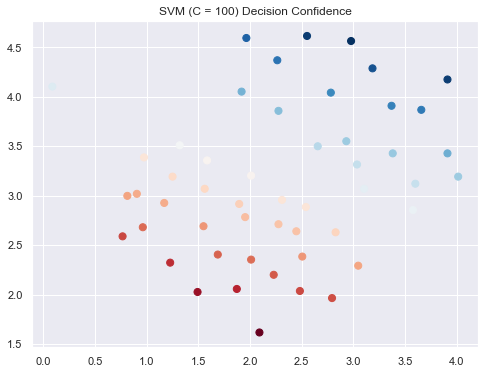

In [23]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(data['X1'], data['X2'], s = 50, c = data['SVM100_Confidence'], cmap = 'RdBu')
ax.set_title('SVM (C = 100) Decision Confidence')
plt.show()

In [24]:
data.head()

,X1,X2,y,SVM1_Confidence,SVM100_Confidence
0,1.9643,4.5957,1,0.963219,3.101454
1,2.2753,3.8589,1,0.484685,1.206823
2,2.9781,4.5651,1,1.488561,3.988647
3,2.9320,3.5519,1,0.572435,0.926075
4,3.5772,2.8560,1,0.311920,-0.524213
